In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

from matplotlib.colors import ListedColormap

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Inspecting the dataframe 

In [3]:
# Importing dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data cleaning 

### Replacing "Select" category with null values

In [7]:
# Select all non-numeric columns
lead_obj = lead_data.select_dtypes(include='object')

# Find out columns that have "Select"
select = lambda x: x.str.contains('Select', na=False)
list1 = lead_obj.columns[lead_obj.apply(select).any()].tolist()
print (list1)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


* There are 4 columns that contains `Select`, which are actually null values. 

In [8]:
# selecting all the columns that have a "Select" entry
select_columns = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

# replacing values
lead_data[select_columns] = lead_data[select_columns].replace('Select', np.NaN)

In [9]:
# Calculate percentage of null values for each column
(lead_data.isnull().sum() / lead_data.shape[0]) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Dropping columns that have null values > 40% 

In [10]:
lead_data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'
               ,'Lead Profile','Lead Quality','How did you hear about X Education'], axis = 1, inplace = True)

lead_data.head(1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified


In [11]:
(lead_data.isnull().sum() / lead_data.shape[0]) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

* There are five columns that still have high missing values: `Country`, `Specialization`, `What is your current occupation`, `What matters most to you in choosing a course`, and `City`. 

### Imputing missing values in columns with high number of null values

#### 1) ` Tags ` column

In [12]:
lead_data.Tags.value_counts(normalize = True, dropna = False) * 100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

* Tags , Last Activity and Last Notable Activity contain remarks from the sales executive who make calls to the potential customers. We can't use this data generated by sales team for the purpose of building a model that calculates lead score. So these columns can be dropped.  

In [13]:
lead_data.drop('Tags', axis = 1, inplace = True)

In [14]:
lead_data.drop('Last Activity', axis = 1, inplace = True)

In [15]:
lead_data.drop('Last Notable Activity', axis = 1, inplace = True)

#### 2) ` Country ` column

In [16]:
lead_data.Country.value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

* The distribution of the data is very heavily skewed, with India + null values = 97% of the total. Therefore we can drop this column.

In [17]:
lead_data.drop('Country', axis = 1, inplace = True)

#### 3) `City` column

In [18]:
lead_data['City'].value_counts(normalize = True, dropna = False) * 100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

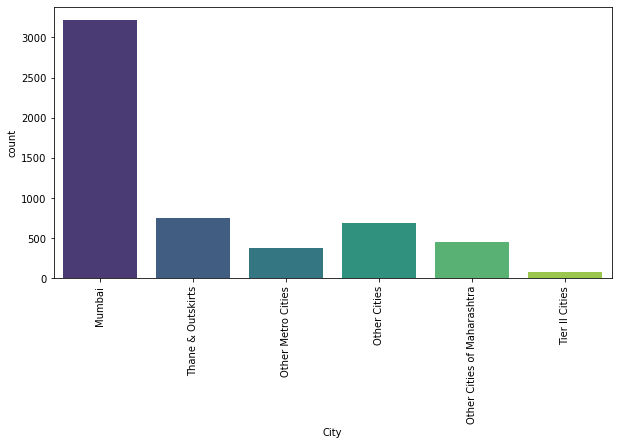

In [19]:
plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data.City, palette='viridis')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

* For this column also, we are combining categories, and then imputing proportionally so that new values do not introduce bias

In [20]:
lead_data.loc[(lead_data['City'] == 'Thane & Outskirts') | (lead_data['City'] == 'Other Cities of Maharashtra'), 
       'City'] = 'Other Cities in Maharashtra'

lead_data.loc[(lead_data['City'] == 'Other Cities') | (lead_data['City'] == 'Tier II Cities') , 
       'City'] = 'Cities of other states'

In [21]:
lead_data['City'].value_counts(normalize = True) * 100

Mumbai                         57.835218
Other Cities in Maharashtra    21.701669
Cities of other states         13.642075
Other Metro Cities              6.821038
Name: City, dtype: float64

In [22]:
lead_data['City'] = lead_data['City'].fillna(pd.Series(np.random.choice(['Mumbai', 'Other Cities in Maharashtra', 
                                                                   'Cities of other states','Other Metro Cities'], 
                                                                  p = [0.5784, 0.2170, 0.1364, 0.0682], size = len(lead_data))))

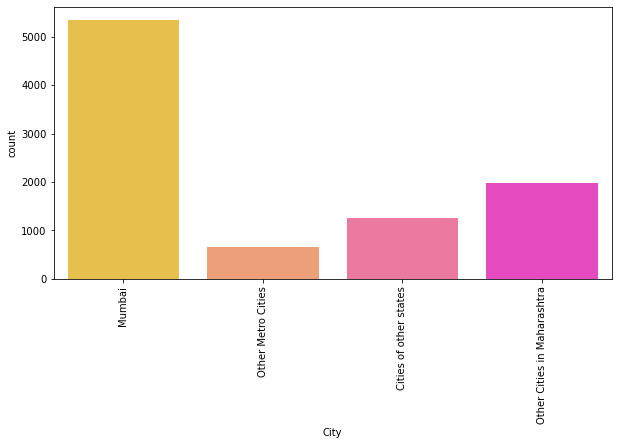

In [23]:
plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data['City'], palette='spring_r')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### 4) `What is your current occupation` column

In [24]:
lead_data['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

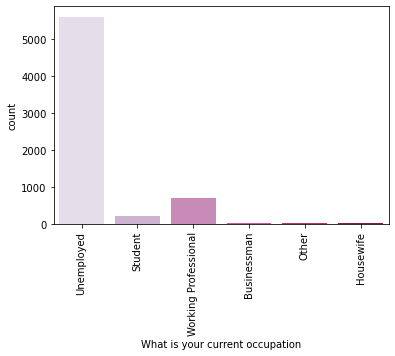

In [25]:
s=sns.countplot(lead_data['What is your current occupation'], palette='PuRd')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

* For this column, we are combining categories, and then imputing proportionally so that new values do not introduce bias

In [26]:
# combine low representing categories
lead_data.loc[(lead_data['What is your current occupation'] == 'Student') | (lead_data['What is your current occupation'] == 'Other') | (lead_data['What is your current occupation'] == 'Housewife') | 
       (lead_data['What is your current occupation'] == 'Businessman') , 'What is your current occupation' ] = 'Student and Others'

In [27]:
lead_data['What is your current occupation'].value_counts(normalize = True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student and Others       3.725191
Name: What is your current occupation, dtype: float64

In [28]:
# impute proportionately
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(lead_data))))

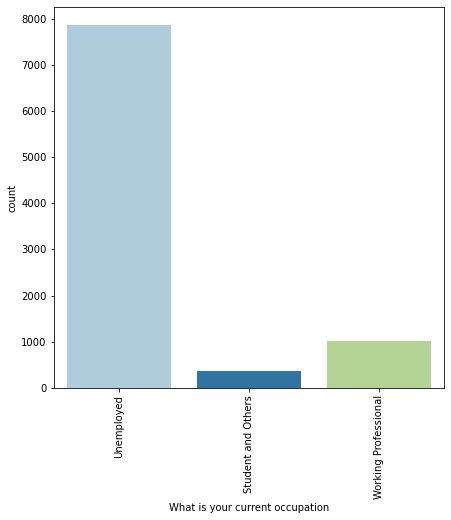

In [29]:
plt.figure(figsize=(7,7))
s1=sns.countplot(lead_data['What is your current occupation'],palette='Paired')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### 5) `What matters most to you in choosing a course` column

In [30]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

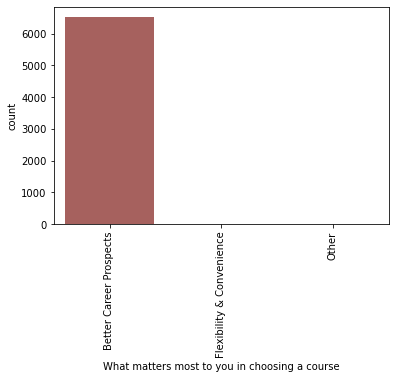

In [31]:
s1=sns.countplot(lead_data['What matters most to you in choosing a course'],palette='twilight_r')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

* The distribution of the data is very heavily skewed, with Better career prospects + null values = approx 100% of the total. Therefore we can drop this column.

In [32]:
lead_data.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

#### 6) `Specialization` column

In [33]:
lead_data.Specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

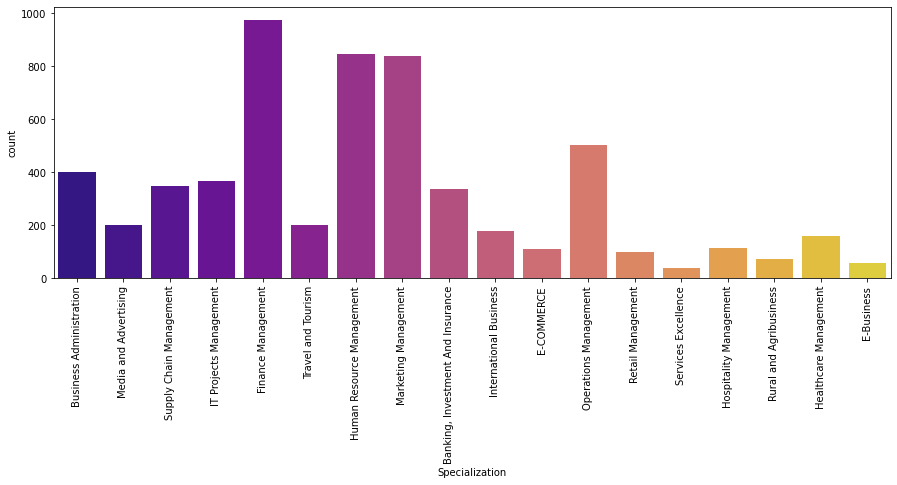

In [34]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_data.Specialization,palette='plasma')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

* For this column also, we are combining categories, and then imputing proportionally so that new values do not introduce bias

In [35]:
# merging levels for all management specialization
lead_data.loc[(lead_data['Specialization'] == 'Finance Management') | (lead_data['Specialization'] == 'Human Resource Management') | 
       (lead_data['Specialization'] == 'Marketing Management') |  (lead_data['Specialization'] == 'Operations Management') |
       (lead_data['Specialization'] == 'IT Projects Management') | (lead_data['Specialization'] == 'Supply Chain Management') |
       (lead_data['Specialization'] == 'Healthcare Management') | (lead_data['Specialization']== 'Hospitality Management') |
       (lead_data['Specialization'] == 'Retail Management') , 'Specialization'] = 'Management Specializations'

# merging levels for all busines specialization
lead_data.loc[(lead_data['Specialization'] == 'Business Administration') | (lead_data['Specialization'] == 'International Business') | 
       (lead_data['Specialization'] == 'Rural and Agribusiness') | (lead_data['Specialization'] == 'E-Business') 
        , 'Specialization'] = 'Business Specializations'

# merging levels for all industry specialization
lead_data.loc[(lead_data['Specialization'] == 'Banking, Investment And Insurance') | (lead_data['Specialization'] == 'Media and Advertising') |
       (lead_data['Specialization']== 'Travel and Tourism') | (lead_data['Specialization'] == 'Services Excellence') |
       (lead_data['Specialization'] == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

In [36]:
lead_data['Specialization'].value_counts(normalize = True) * 100

Management Specializations    72.576792
Industry Specializations      15.290102
Business Specializations      12.133106
Name: Specialization, dtype: float64

In [37]:
# impute proportionately
lead_data['Specialization'] = lead_data['Specialization'].fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(lead_data))))

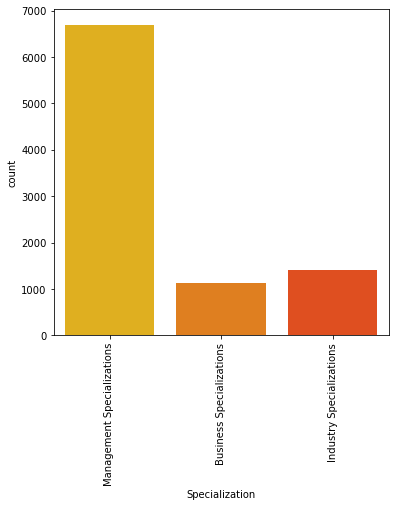

In [38]:
plt.figure(figsize=(6,6))
s1=sns.countplot(lead_data['Specialization'],palette='autumn_r')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Imputing missing values in columns with low number of null values

In [39]:
(lead_data.isnull().sum() / lead_data.shape[0]) * 100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

#### 1) `Lead Source` column

In [40]:
lead_data['Lead Source'].value_counts(normalize = True, dropna = False) * 100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [41]:
lead_data.loc[(lead_data['Lead Source'] == 'Welingak Website') | (lead_data['Lead Source'] == 'Referral Sites') | (lead_data['Lead Source'] == 'Facebook') | (lead_data['Lead Source'] == 'bing') | (lead_data['Lead Source'] == 'Click2call')
             | (lead_data['Lead Source'] == 'Press_Release')  | (lead_data['Lead Source'] == 'Social Media') | (lead_data['Lead Source'] == 'Live Chat') | (lead_data['Lead Source'] == 'youtubechannel')| (lead_data['Lead Source'] == 'testone') 
            | (lead_data['Lead Source'] == 'Pay per Click Ads') | (lead_data['Lead Source'] == 'welearnblog_Home')  | (lead_data['Lead Source'] == 'WeLearn')| (lead_data['Lead Source'] == 'blog') | (lead_data['Lead Source'] == 'NC_EDM')  
        , 'Lead Source'] = 'Other sources'

In [42]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google', 'Google')

In [43]:
lead_data['Lead Source'].value_counts(normalize = True) * 100

Google            31.214689
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
Reference          5.801825
Other sources      3.748370
Name: Lead Source, dtype: float64

In [44]:
# imputing proportionately
lead_data['Lead Source'] = lead_data['Lead Source'].fillna(pd.Series(np.random.choice(['Google','Direct Traffic','Olark Chat','Organic Search',
                                                                                      'Reference','Other sources'], 
                                                                   p = [0.312147,0.276293,0.190678,0.125380,0.058018,0.037484], size = len(lead_data))))

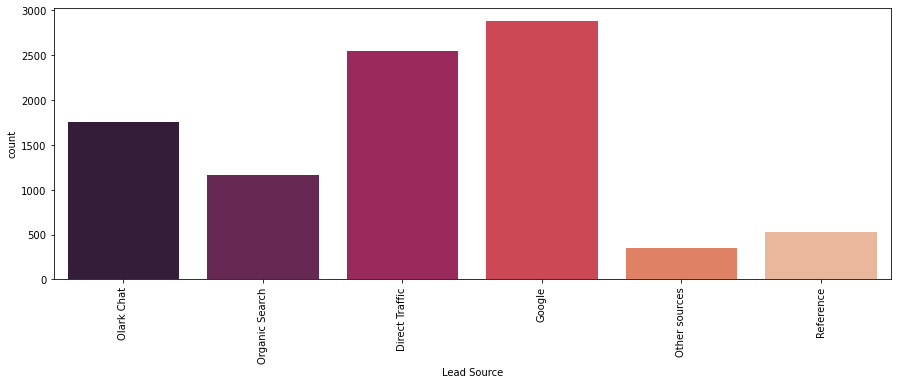

In [45]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_data['Lead Source'],palette='rocket')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### 2) `TotalVisits` column

In [46]:
lead_data['TotalVisits'].fillna(lead_data['TotalVisits'].median(), inplace=True)
lead_data['TotalVisits'] = lead_data['TotalVisits'].astype('int')

In [47]:
lead_data['TotalVisits'].value_counts()

0      2189
2      1680
3      1443
4      1120
5       783
6       466
1       395
7       309
8       224
9       164
10      114
11       86
13       48
12       45
14       36
16       21
15       18
17       16
18       15
20       12
19        9
21        6
23        6
24        5
25        5
27        5
22        3
29        2
28        2
26        2
141       1
55        1
30        1
43        1
74        1
41        1
54        1
115       1
251       1
32        1
42        1
Name: TotalVisits, dtype: int64

#### 3) `Page Views Per Visit` column

In [48]:
lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].median(), inplace=True)
lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].astype('int')

In [49]:
lead_data['Page Views Per Visit'].value_counts()

2     2372
0     2189
3     1360
1     1212
4      956
5      547
6      260
7      135
8       89
9       45
10      25
11      19
14      10
13       6
12       6
15       4
16       3
55       1
24       1
Name: Page Views Per Visit, dtype: int64

#### 4) `Lead Origin` column

In [50]:
lead_data['Lead Origin'].value_counts(normalize = True, dropna = False) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

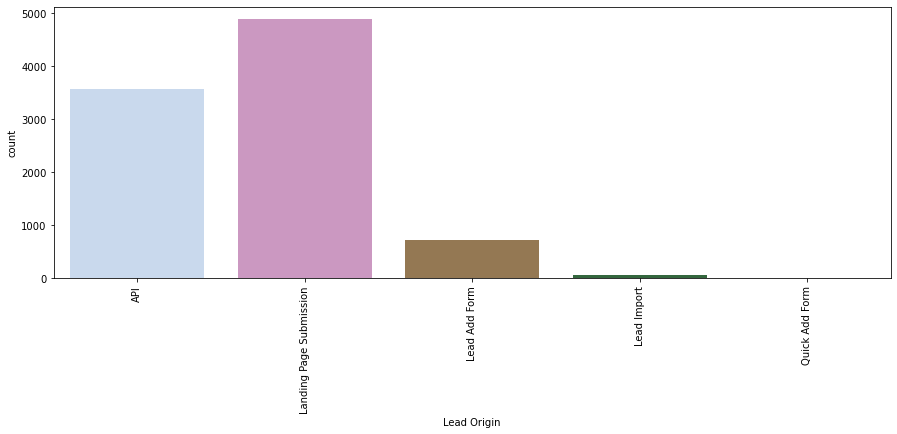

In [51]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_data['Lead Origin'],palette='cubehelix_r')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [52]:
lead_data.loc[(lead_data['Lead Origin'] == 'Lead Import') | (lead_data['Lead Origin'] == 'Quick Add Form') | (lead_data['Lead Origin'] == 'Lead Add Form')
       , 'Lead Origin'] = 'Add Forms and Import'

In [53]:
lead_data['Lead Origin'].value_counts(normalize = True, dropna = False) * 100

Landing Page Submission    52.878788
API                        38.744589
Add Forms and Import        8.376623
Name: Lead Origin, dtype: float64

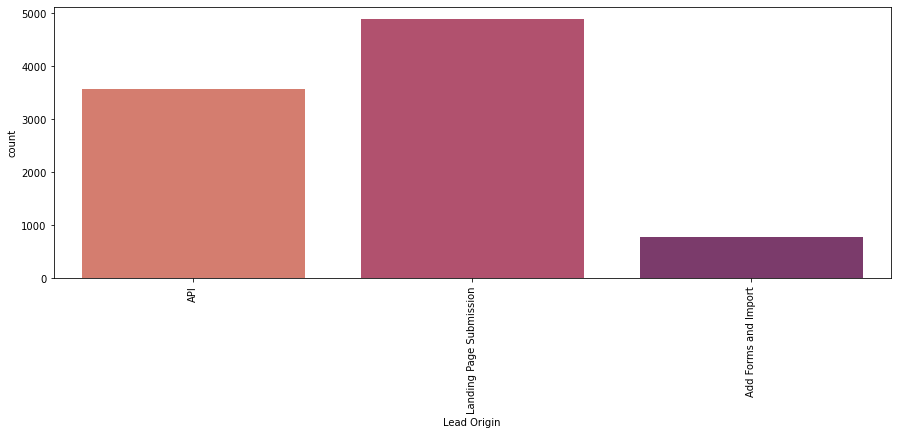

In [54]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_data['Lead Origin'],palette='flare')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [55]:
(lead_data.isnull().sum() / lead_data.shape[0]) * 100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

### Handling imbalance in binary variables

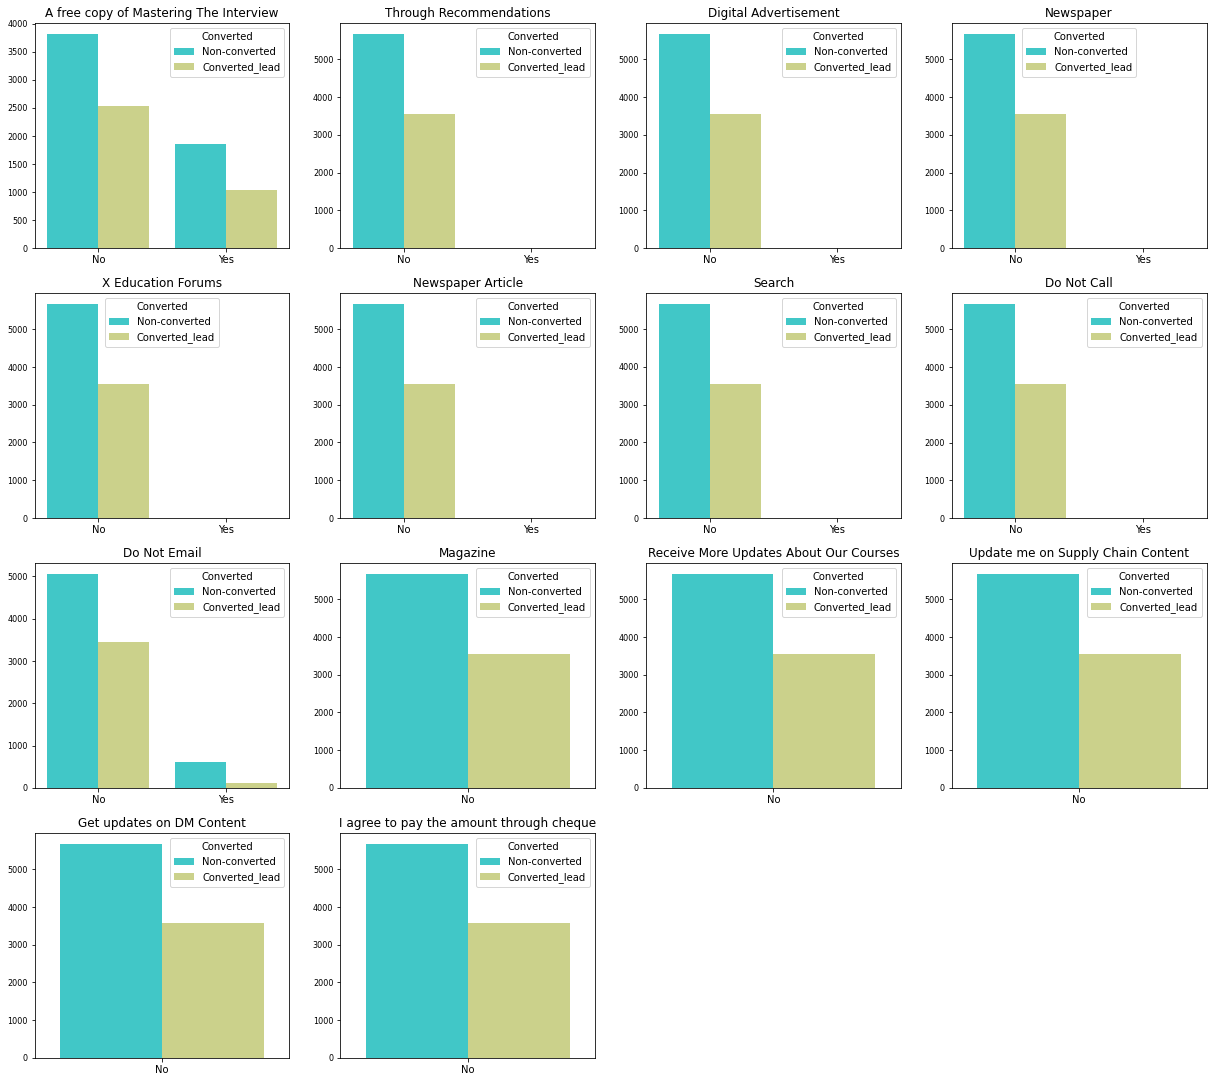

In [56]:
col_Doc = ['A free copy of Mastering The Interview','Through Recommendations','Digital Advertisement','Newspaper',
           'X Education Forums','Newspaper Article','Search','Do Not Call','Do Not Email','Magazine','Receive More Updates About Our Courses'
           ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
df_flag = lead_data[col_Doc+["Converted"]]

length = len(col_Doc)

df_flag["Converted"] = df_flag["Converted"].replace({1:"Converted_lead",0:"Non-converted"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["Converted"],palette='rainbow')
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [57]:
for column in col_Doc:
    x = (lead_data[column].value_counts(normalize = True)) * 100
    print(x)
    print()

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

No    100.0
Name: Magazine, dtype: float64

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

No    100.0
Name: Get updates on DM Content, dtype: float64

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64



* Almost all binary variables are heavily skewed towards one category. Due to data imbalance these variables can not be used for modeling.  

In [58]:
lead_data.drop(lead_data[col_Doc].columns.difference(['A free copy of Mastering The Interview']), axis=1, inplace=True)

In [59]:
lead_data.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0,Management Specializations,Unemployed,Mumbai,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2,Management Specializations,Unemployed,Other Metro Cities,No


# Exploratory Data Analysis for converted and non-converted 

### Numerical columns

#### `TotalVisits` column

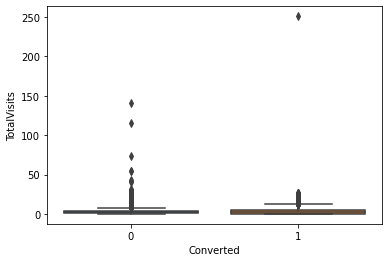

In [60]:
plt.figure(figsize=(6,4))
sns.boxplot('Converted','TotalVisits',data=lead_data)
plt.show()

* For converted leads there are no outliers except for one value i.e. 251. Non converted leads have a lot of outliers for which capping has to be done. The common range here is 0-50 for both the categories. 

#### `Total Time Spent on Website` column

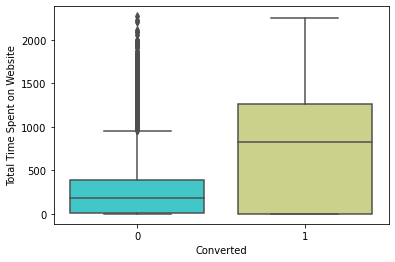

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot('Converted','Total Time Spent on Website',palette='rainbow',data=lead_data)
plt.show()

* Clearly converted leads have spent more time on the website than the non-converted ones. Still there are many outliers in the non-converted leads which have to be taken care of. 

#### `Page Views Per Visit` column

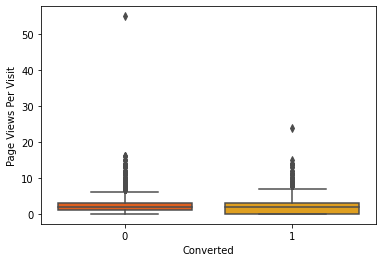

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot('Converted','Page Views Per Visit',palette='autumn',data=lead_data)
plt.show()

* The trend here is similar to what we saw for the TotalVisits column. Outlier treatment will be done for all the columns in the data preparation section. 

In [63]:
## Correlation Matrix

cor = lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr()
cor

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,1.000000,0.217341,0.482764
Total Time Spent on Website,0.217341,1.000000,0.302615
Page Views Per Visit,0.482764,0.302615,1.000000


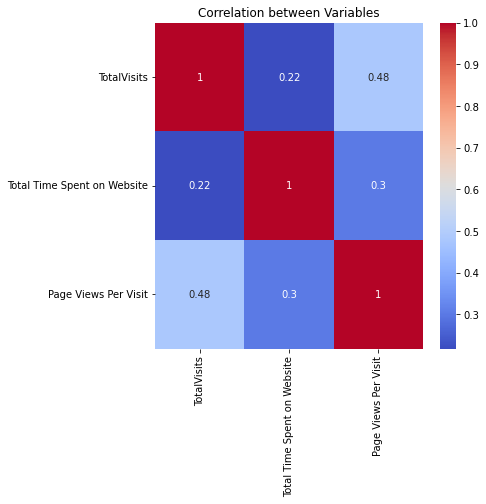

In [64]:
#Checking correlations of numeric values
## heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.title("Correlation between Variables")
plt.show()

* None of the numerical columns are highly correlated with each other.  

### Categorical columns

#### `Lead Origin` column

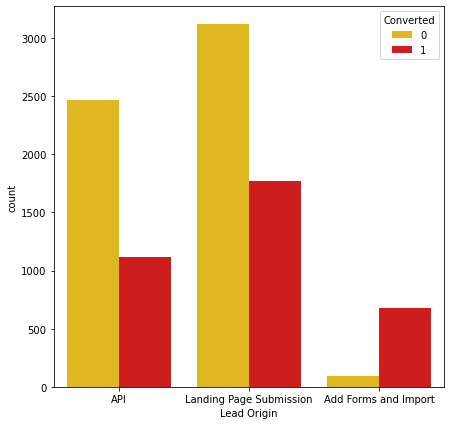

In [65]:
plt.rcParams['figure.figsize']=(7,7)

sns.countplot(x = 'Lead Origin', data = lead_data , hue = 'Converted', palette='hot_r')
 

plt.show()

* Quite a few converted leads originate from Add forms and Lead Import. Although most of them originate from Landing page and a lot many come from APIs.

#### `City` column

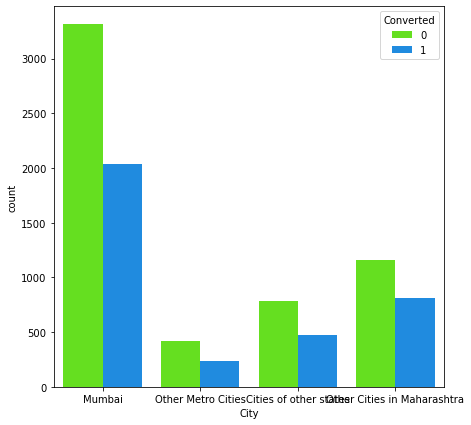

In [66]:
plt.rcParams['figure.figsize']=(7,7)

sns.countplot(x = 'City', data = lead_data , hue = 'Converted', palette='gist_rainbow')
 

plt.show()

* Mumbai and other cities of maharashtra have more converted leads as compared to other metro cities and cities of other states.

#### `What is your current occupation` column

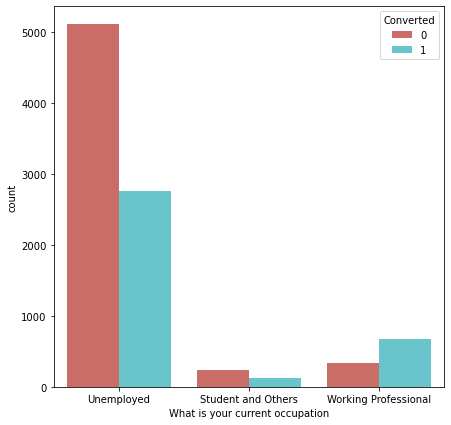

In [67]:
plt.rcParams['figure.figsize']=(7,7)

sns.countplot(x = 'What is your current occupation', data = lead_data , hue = 'Converted', palette='hls')
 

plt.show()

* The proportion of converted working professional leads out of total working professional leads is significantly high. Although more number of converted leads come from the unemployed section.   

#### `Specialization` column

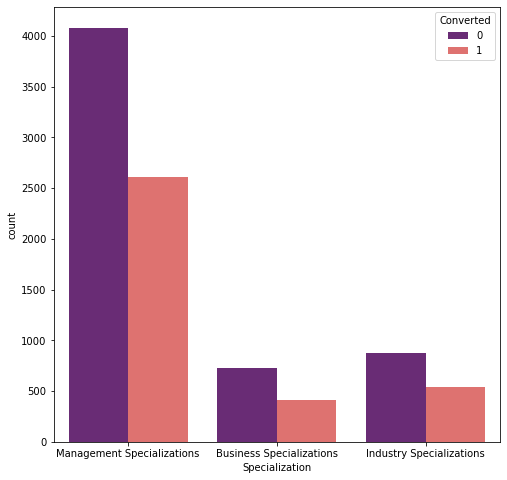

In [68]:
plt.rcParams['figure.figsize']=(8,8)

sns.countplot(x = 'Specialization', data = lead_data , hue = 'Converted', palette='magma')
 

plt.show()

* Management Professionals form a large part of the converted leads and business professionals are the least in numbers.

#### `Lead Source` column

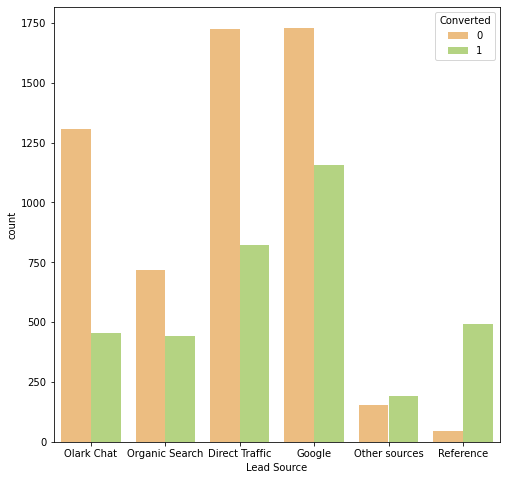

In [69]:
plt.rcParams['figure.figsize']=(8,8)

sns.countplot(x = 'Lead Source', data = lead_data , hue = 'Converted', palette='RdYlGn')
 

plt.show()

* The proportion of converted reference leads out of total reference leads is significantly high. Although high number of converted leads come from Google and Direct Traffic.   

# Data Preparation

## Dropping column with unique Id

In [70]:
lead_data.drop(['Prospect ID'], axis = 1, inplace = True)

## Converting Binary (Yes/No) to 0/1

In [71]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable
lead_data[['A free copy of Mastering The Interview']] = lead_data[['A free copy of Mastering The Interview']].apply(binary_map)

In [72]:
lead_data.head(2)

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0,0,Management Specializations,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,5,674,2,Management Specializations,Unemployed,Other Metro Cities,0


## For categorical variables with multiple levels, creating dummy features (one-hot encoded)

In [73]:
# Creating dummy variables for the categorical variables and dropping the first one.
dummies = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'City']], drop_first = True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummies], axis=1)

In [74]:
lead_data.head(2)

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,...,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Specialization_Industry Specializations,Specialization_Management Specializations,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities in Maharashtra,City_Other Metro Cities
0,660737,API,Olark Chat,0,0,0,0,Management Specializations,Unemployed,Mumbai,...,0,0,0,0,1,1,0,1,0,0
1,660728,API,Organic Search,0,5,674,2,Management Specializations,Unemployed,Other Metro Cities,...,1,0,0,0,1,1,0,0,0,1


In [75]:
lead_data.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'City'], axis = 1, inplace = True)

In [76]:
lead_data.head(2)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Add Forms and Import,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Specialization_Industry Specializations,Specialization_Management Specializations,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities in Maharashtra,City_Other Metro Cities
0,660737,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
1,660728,0,5,674,2,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1


## Checking for outliers

In [77]:
# Checking for outliers in the continuous variables
num_lead = lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [78]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.289286
std,4.819024,548.021466,2.150012
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [79]:
# Capping at 99 percentile for both the columns
lead_data['TotalVisits'].loc[lead_data['TotalVisits'] >= lead_data['TotalVisits'].quantile(0.99)] = lead_data['TotalVisits'].quantile(0.99)
lead_data['Page Views Per Visit'].loc[lead_data['Page Views Per Visit'] >= 
                            lead_data['Page Views Per Visit'].quantile(0.99)] = lead_data['Page Views Per Visit'].quantile(0.99)

## Test-Train Split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
# Putting feature variable to X
X = lead_data.drop(['Lead Number','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Add Forms and Import,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Specialization_Industry Specializations,Specialization_Management Specializations,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities in Maharashtra,City_Other Metro Cities
0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
1,5,674,2,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
2,2,1532,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,305,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0
4,2,1428,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0


In [82]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [83]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Add Forms and Import,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Specialization_Industry Specializations,Specialization_Management Specializations,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities in Maharashtra,City_Other Metro Cities
1871,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
6795,0.235294,0.214349,0.111111,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3516,0.294118,0.046655,0.222222,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
8105,0.294118,0.541373,0.555556,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0


## Looking at correlations

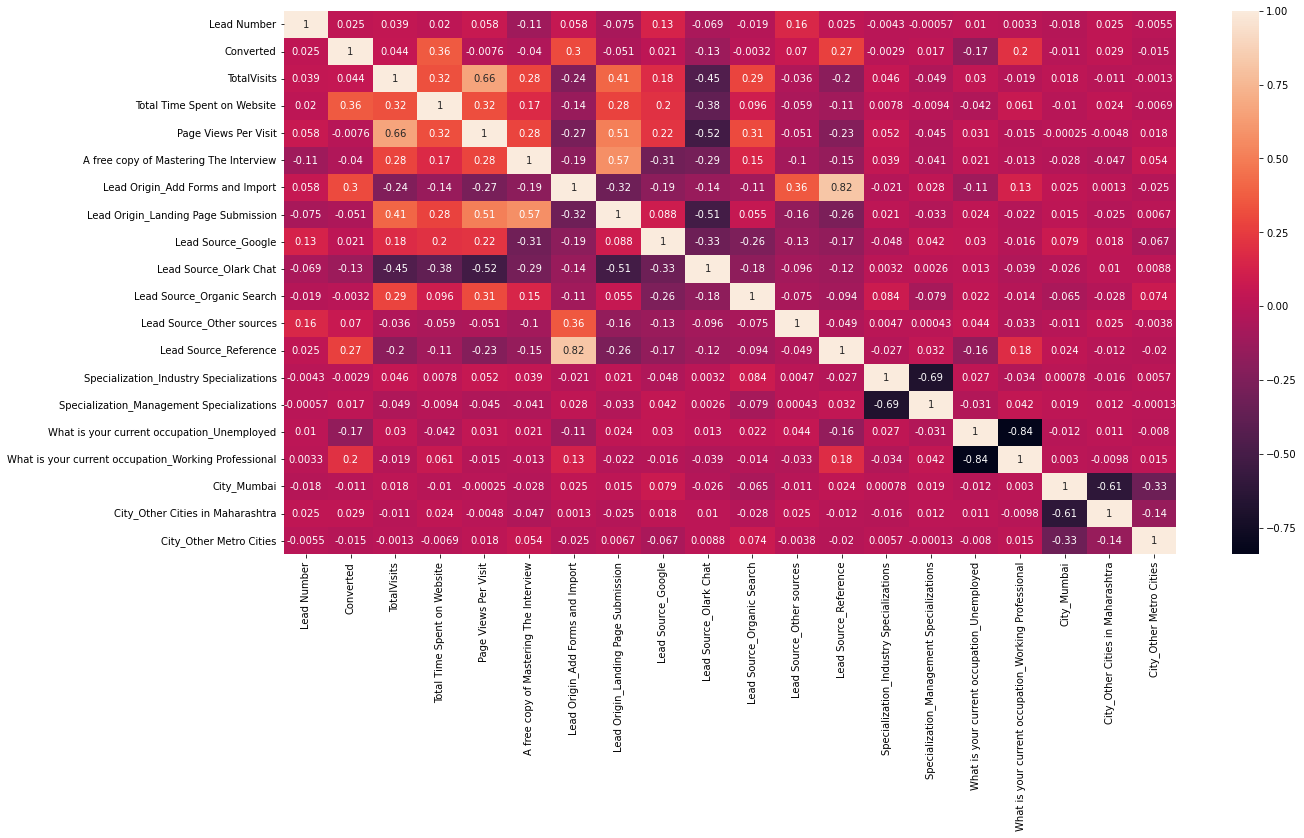

In [86]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

## Dropping highly correlated dummy variables

In [87]:
X_test.drop(['Lead Origin_Add Forms and Import', 'Specialization_Industry Specializations', 
                     'What is your current occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['Lead Origin_Add Forms and Import', 'Specialization_Industry Specializations', 
                     'What is your current occupation_Working Professional'], axis = 1, inplace = True)

* Checking the Correlation Matrix

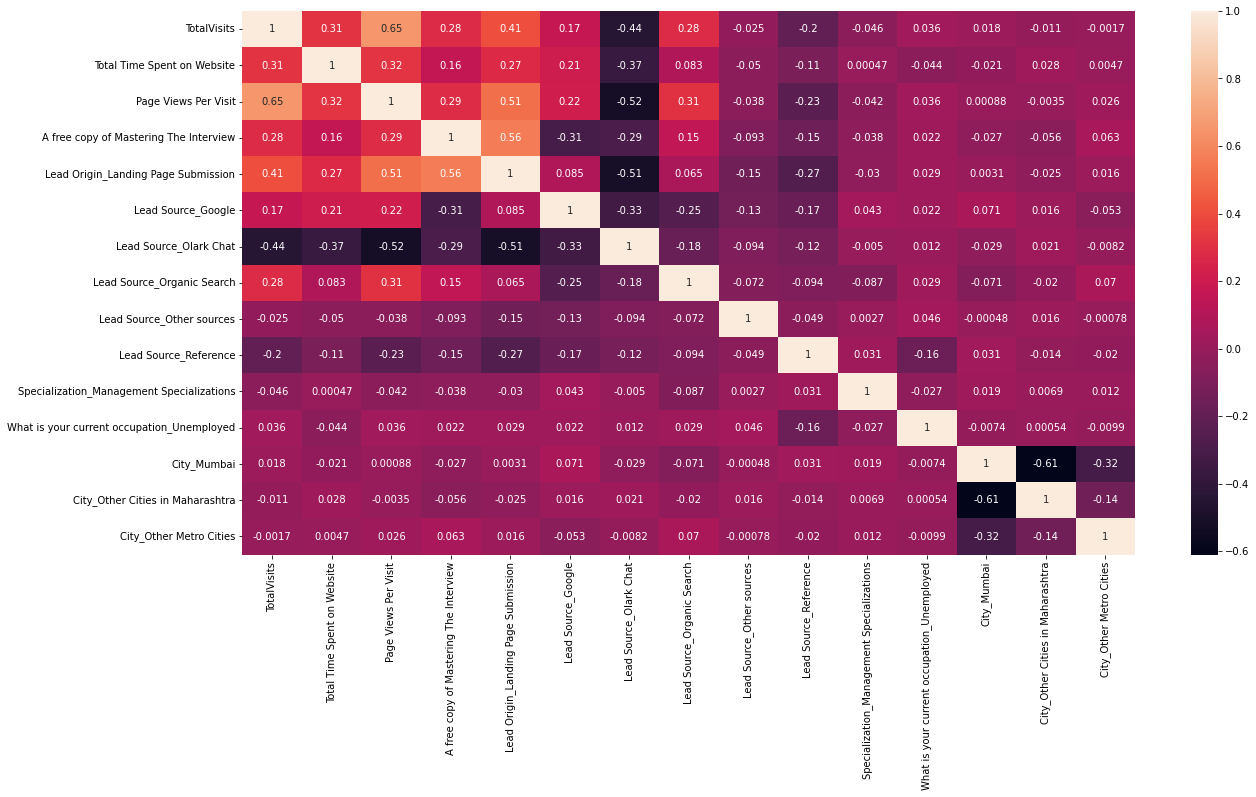

In [88]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

# Model Building

## Running Your First Training Model

In [89]:
import statsmodels.api as sm

In [90]:
log_m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3351.3
Date:                Wed, 09 Feb 2022   Deviance:                       6702.7
Time:                        19:36:11   Pearson chi2:                 6.65e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.3815      0.167     -8.272      0.000      -1.709      -1.054
TotalVisits                                    0.6910      0.207      3.339      0.001       0.285       1.097
Total Time Spent on Website                    4.3797      0.147     29.740      0.000       4.091       4.668
Page Views Per Visit                          -0.6791      0.205     -3.305      0.001      -1.082      -0.276
A free copy of Mastering The Interview         0.0010      0.092      0.011      0.991      -0.180       0.182
Lead Origin_Landing Page Submission           -0.0223      0.092     -0.242      0.808      -0.202       0.158
Lead Source_Google                             0.3618      0.099      3.673      0.000       0.169       0.555
Lead Source_Olark Chat                         0.7647      0.135      5.675      0.000       0.501       1.029
Lead Source_Organic Search                     0.2349      0.114      2.058      0.040       0.011       0.459
Lead Source_Other sources                      1.6974      0.175      9.713      0.000       1.355       2.040
Lead Source_Reference                          4.0286      0.219     18.404      0.000       3.600       4.458
Specialization_Management Specializations      0.0537      0.069      0.783      0.434      -0.081       0.188
What is your current occupation_Unemployed    -0.8092      0.084     -9.671      0.000      -0.973      -0.645
City_Mumbai                                   -0.0055      0.091     -0.061      0.952      -0.185       0.174
City_Other Cities in Maharashtra               0.1137      0.104      1.090      0.276      -0.091       0.318
City_Other Metro Cities                        0.0110      0.140      0.078      0.938      -0.264       0.286
==============================================================================================================
"""

## Feature Selection Using RFE

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [93]:
rfe.support_

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False,  True, False])

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other sources', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Management Specializations', False, 3),
 ('What is your current occupation_Unemployed', True, 1),
 ('City_Mumbai', False, 6),
 ('City_Other Cities in Maharashtra', True, 1),
 ('City_Other Metro Cities', False, 5)]

In [95]:
col = X_train.columns[rfe.support_]

In [96]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission',
       'Specialization_Management Specializations', 'City_Mumbai',
       'City_Other Metro Cities'],
      dtype='object')

## Assessing the model with StatsModels

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3351.7
Date:                Wed, 09 Feb 2022   Deviance:                       6703.4
Time:                        19:36:12   Pearson chi2:                 6.64e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.3589      0.115    -11.782      0.000      -1.585      -1.133
TotalVisits                                    0.6846      0.205      3.331      0.001       0.282       1.087
Total Time Spent on Website                    4.3804      0.147     29.760      0.000       4.092       4.669
Page Views Per Visit                          -0.6925      0.200     -3.467      0.001      -1.084      -0.301
Lead Source_Google                             0.3697      0.078      4.739      0.000       0.217       0.523
Lead Source_Olark Chat                         0.7794      0.111      7.019      0.000       0.562       0.997
Lead Source_Organic Search                     0.2394      0.106      2.257      0.024       0.032       0.447
Lead Source_Other sources                      1.7130      0.157     10.888      0.000       1.405       2.021
Lead Source_Reference                          4.0455      0.205     19.763      0.000       3.644       4.447
What is your current occupation_Unemployed    -0.8103      0.084     -9.689      0.000      -0.974      -0.646
City_Other Cities in Maharashtra               0.1175      0.073      1.615      0.106      -0.025       0.260
==============================================================================================================
"""

* p-value of variable City_Other Cities in Maharashtra is high, so we can drop it.

In [99]:
col = col.drop('City_Other Cities in Maharashtra',1)

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3353.0
Date:                Wed, 09 Feb 2022   Deviance:                       6706.0
Time:                        19:37:18   Pearson chi2:                 6.64e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.3363      0.114    -11.680      0.000      -1.560      -1.112
TotalVisits                                    0.6806      0.205      3.313      0.001       0.278       1.083
Total Time Spent on Website                    4.3872      0.147     29.816      0.000       4.099       4.676
Page Views Per Visit                          -0.6892      0.200     -3.452      0.001      -1.081      -0.298
Lead Source_Google                             0.3720      0.078      4.771      0.000       0.219       0.525
Lead Source_Olark Chat                         0.7850      0.111      7.075      0.000       0.568       1.003
Lead Source_Organic Search                     0.2385      0.106      2.249      0.024       0.031       0.446
Lead Source_Other sources                      1.7210      0.157     10.946      0.000       1.413       2.029
Lead Source_Reference                          4.0454      0.205     19.764      0.000       3.644       4.447
What is your current occupation_Unemployed    -0.8112      0.084     -9.701      0.000      -0.975      -0.647
==============================================================================================================
"""

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.49
8,What is your current occupation_Unemployed,3.93
0,TotalVisits,3.71
1,Total Time Spent on Website,2.01
3,Lead Source_Google,1.93
4,Lead Source_Olark Chat,1.60
5,Lead Source_Organic Search,1.50
6,Lead Source_Other sources,1.10
7,Lead Source_Reference,1.09


* The VIFs are all less than 5. So we don't need to drop any of these variables

In [103]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.203838
6795    0.245355
3516    0.247729
8105    0.602750
3934    0.203838
4844    0.827939
3297    0.155205
8071    0.965597
987     0.752253
7423    0.783503
dtype: float64

In [104]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20383792, 0.24535549, 0.24772911, 0.60274982, 0.20383792,
       0.82793917, 0.15520467, 0.96559694, 0.75225348, 0.78350266])

## Creating a dataframe with the actual Converted flag and the predicted probabilities

In [105]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.203838,1871
1,0,0.245355,6795
2,0,0.247729,3516
3,0,0.602750,8105
4,0,0.203838,3934


## Creating new column 'Predicted' with 1 if Converted_prob > 0.5 else 0

In [106]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.203838,1871,0
1,0,0.245355,6795,0
2,0,0.247729,3516,0
3,0,0.602750,8105,1
4,0,0.203838,3934,0


In [107]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3482  520]
 [1042 1424]]


In [108]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7585034013605442


# Metrics beyond simply accuracy

In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5774533657745337

In [111]:
# Let us calculate specificity
TN / float(TN+FP)

0.8700649675162418

In [112]:
# Calculate False Postive Rate - predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.12993503248375812


In [113]:
# positive predictive value 
print (TP / float(TP+FP))

0.7325102880658436


In [114]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7696728558797524


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [115]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

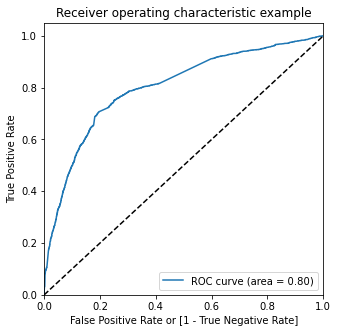

In [117]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

* The ROC Curve should be a value close to 1. We are getting a good value of 0.80 indicating a good predictive model.

## Finding Optimal Cutoff Point

We had chosen an cut-off value of 0.5 randomly. We need to determine the best cut-off value for balanced sensitivity and specificity:

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.203838,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.245355,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.247729,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.602750,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.203838,3934,0,1,1,1,0,0,0,0,0,0,0
5,1,0.827939,4844,1,1,1,1,1,1,1,1,1,1,0
6,0,0.155205,3297,0,1,1,0,0,0,0,0,0,0,0
7,1,0.965597,8071,1,1,1,1,1,1,1,1,1,1,1
8,0,0.752253,987,1,1,1,1,1,1,1,1,1,0,0
9,1,0.783503,7423,1,1,1,1,1,1,1,1,1,0,0


In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.389920  0.998378  0.014993
0.2   0.2  0.590909  0.913625  0.392054
0.3   0.3  0.743816  0.761963  0.732634
0.4   0.4  0.759740  0.653285  0.825337
0.5   0.5  0.758503  0.577453  0.870065
0.6   0.6  0.743506  0.474858  0.909045
0.7   0.7  0.714750  0.340227  0.945527
0.8   0.8  0.688621  0.227088  0.973013
0.9   0.9  0.651824  0.094485  0.995252


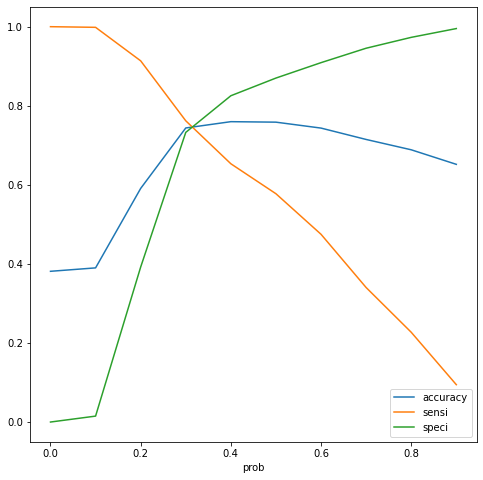

In [120]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [121]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.203838,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.245355,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.247729,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.602750,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.203838,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [122]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7438157081014224

In [123]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2932, 1070],
       [ 587, 1879]], dtype=int64)

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7619626926196269

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.7326336831584208

In [127]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2673663168415792


In [128]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6371651407256698


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8331912475134982


# Precision and Recall

In [130]:
#Looking at the confusion matrix again

In [131]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3482,  520],
       [1042, 1424]], dtype=int64)

In [132]:
## Precision
TP / TP + FP

1071.0

In [133]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7325102880658436

In [134]:
## Recall
TP / TP + FN

588.0

In [135]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5774533657745337

In [136]:
from sklearn.metrics import precision_score, recall_score

In [137]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6371651407256698

In [138]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7619626926196269

## Precision and recall tradeoff

In [139]:
from sklearn.metrics import precision_recall_curve

In [140]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: final_Predicted, Length: 6468, dtype: int64)

In [141]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

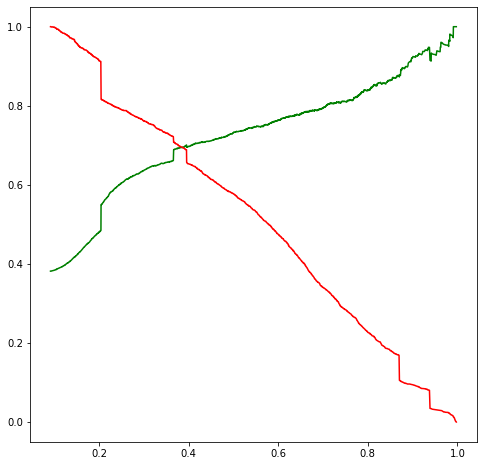

In [142]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [143]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.39 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,final_predicted
0,0,0.203838,1871,0,1,1,1,0,0,0,0,0,0,0,0,0
1,0,0.245355,6795,0,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.247729,3516,0,1,1,1,0,0,0,0,0,0,0,0,0
3,0,0.602750,8105,1,1,1,1,1,1,1,1,0,0,0,1,1
4,0,0.203838,3934,0,1,1,1,0,0,0,0,0,0,0,0,0


In [144]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7674706246134818

In [145]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3258,  744],
       [ 760, 1706]], dtype=int64)

In [146]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Calculate Precision

TP/(TP+FP)

0.6963265306122449

In [148]:
# Calculate Recall

TP/(TP+FN)

0.6918085969180859

This cutoff point seems good to go.

# Making predictions on the test set

In [149]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [150]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,What is your current occupation_Unemployed
4269,8,0.448735,8,0,0,0,0,0,1
2376,0,0.000000,0,0,0,0,0,1,1
7766,5,0.026187,5,1,0,0,0,0,0
9199,0,0.000000,0,0,1,0,0,0,1
4359,0,0.000000,0,0,0,0,0,1,1


In [151]:
X_test_sm = sm.add_constant(X_test)

* Making predictions on the test set

In [152]:
y_test_pred = res.predict(X_test_sm)

In [153]:
y_test_pred[:10]

4269    0.438480
2376    0.869657
7766    0.290659
9199    0.203838
4359    0.869657
9186    0.346344
1631    0.538493
8963    0.524752
8007    0.243917
5324    0.183978
dtype: float64

In [154]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [155]:
# Let's see the head
y_pred_1.head()

,0
4269,0.438480
2376,0.869657
7766,0.290659
9199,0.203838
4359,0.869657


In [156]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [157]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [158]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.438480
1,1,2376,0.869657
2,1,7766,0.290659
3,0,9199,0.203838
4,1,4359,0.869657


In [161]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [162]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.438480
1,1,2376,0.869657
2,1,7766,0.290659
3,0,9199,0.203838
4,1,4359,0.869657


In [163]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [164]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.438480,44
1,2376,1,0.869657,87
2,7766,1,0.290659,29
3,9199,0,0.203838,20
4,4359,1,0.869657,87


In [165]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.39 else 0)

In [166]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.438480,44,1
1,2376,1,0.869657,87,1
2,7766,1,0.290659,29,0
3,9199,0,0.203838,20,0
4,4359,1,0.869657,87,1


In [167]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7056277056277056

In [168]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1120,  557],
       [ 259,  836]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7634703196347032

In [171]:
# Let us calculate specificity
TN / float(TN+FP)

0.6678592725104353

In [172]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6001435750179469

In [173]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7634703196347032

## Observation

After running the model on the Test Data these are the figures we obtain:

* Accuracy : 70.56%
* Sensitivity : 76.34%
* Specificity : 66.78%

## Comparing with values obtained for train set

TRAIN SET :
* Accuracy : 74.38% 
* Sensitivity : 76.19%  
* Specificity : 73.26%

TEST SET :
* Accuracy : 70.56%
* Sensitivity : 76.34%
* Specificity : 66.78%